In [1]:
import os
import torch
import datetime
import json
import numpy as np
import random

from tqdm.auto import tqdm

from torchvision.datasets.coco import CocoDetection

In [2]:
from constants import path_to_data, num_images, label_name_to_value

In [3]:
img_dir = '{}/labels'.format(path_to_data)
img_paths = [os.path.join(img_dir, fname) for fname in sorted(os.listdir(img_dir))]

## coco format - template for annotations

In [4]:
SEED = 238122
labelme_json=img_paths

In [5]:
def lenghts_split(size, perc):
    train_l =  int(0.9 * size)
    return train_l, size - train_l

In [6]:
#tmp = set(train_ind).copy()

random.seed(SEED)
np.random.seed(SEED)

n_img_train, n_img_val = lenghts_split(num_images, .9)

img_indices = np.random.permutation(num_images)
train_ind = img_indices[:n_img_train]
val_ind = img_indices[n_img_train:]

assert len(val_ind) == n_img_val
assert n_img_train + n_img_val == num_images
#assert set(train_ind) == tmp
#tmp = train_ind

len(train_ind), len(val_ind)

(376, 42)

# From Labelme to COCO

In [7]:
from coco.from_labelme import labelme2coco

In [8]:
train_json = [labelme_json[i] for i in train_ind]
val_json = [labelme_json[i] for i in val_ind]

In [9]:
def create_coco_ann_and_images_dir(json_files, dir_name, name_suffix, selected_classes):
    l2c_obj = labelme2coco(
        json_files,
        '{}/{}/ann_{}.json'.format(path_to_data, dir_name, name_suffix),
        only_labels=selected_classes,
        save_img_dir='{}/{}/images/{}'.format(path_to_data, dir_name, name_suffix),
    )
    l2c_obj.save_json()
    return l2c_obj

## Training

## Validation

# Visualize

In [19]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import PIL
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [24]:
annotation_path = '{}/coco_full/ann_train.json'.format(path_to_data)
image_dir = '{}/coco_full/images/train'.format(path_to_data)

In [25]:
annotation_path

'/data/coco_full/ann_train.json'

In [26]:
coco=COCO(annotation_path)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [27]:
coco.getCatIds()

[1, 2, 3]

In [28]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
wall window door

COCO supercategories: 
facade


In [49]:
img_metadata = coco.loadImgs(102)[0]
image_path = os.path.join(image_dir, img_metadata['file_name'])

I = PIL.Image.open(image_path)

In [50]:
img_metadata

{'height': 4016, 'width': 6016, 'id': 102, 'file_name': 'DSC_4349.jpg'}

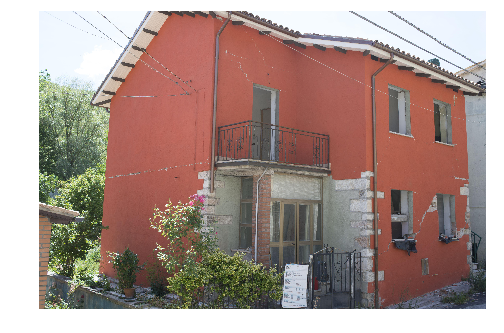

In [51]:
plt.axis('off')
plt.imshow(I)

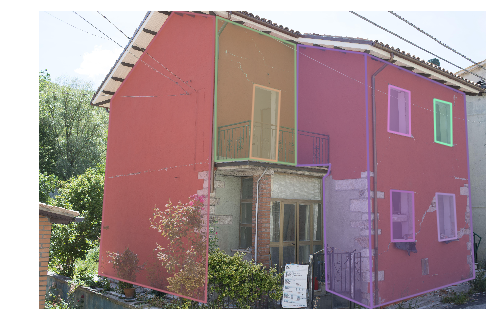

In [55]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
catIds = coco.getCatIds(catNms=[]);
annIds = coco.getAnnIds(imgIds=img_metadata['id'], catIds=catIds)
#print(annIds)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)